# Predict output based on input numbers (y = 2x)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2026-01-30 15:32:52.966019: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Explanation:

	•	tensorflow: Deep learning engine
	•	numpy: For numerical data
	•	matplotlib: For visual output


In [2]:
x = np.array([1, 2, 3, 4, 5], dtype=float)
y = np.array([2, 4, 6, 8, 10], dtype=float)

Explanation:

	•	x = input
	•	y = expected output
	•	Relationship: y = 2x


# Step 3: Build Neural Network Model

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

/home/keshav/anaconda3/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-30 15:33:06.945850: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Explanation:

	•	Sequential: Model with layers in sequence
	•	Dense: Fully connected layer
	•	units=1: One neuron
	•	input_shape=[1]: One input value
This neuron learns : 

output = weight × input + bias

Step 4: Compile the Model

In [4]:
model.compile(
    optimizer='sgd',
    loss='mean_squared_error'
)

Explanation:

	•	optimizer: How model improves (SGD = Gradient Descent)
	•	loss: How wrong the prediction is


In [5]:
history = model.fit(x, y, epochs=200, verbose=0)

Explanation:

	•	epochs: Number of times model sees data
	•	history: Stores loss values

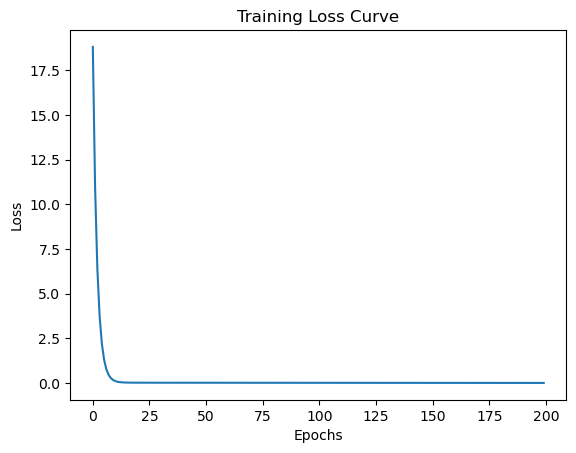

In [6]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

In [8]:
import numpy as np

print(model.predict(np.array([[10]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
[[19.697567]]


# PyTorch

In [9]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [10]:
x = torch.tensor([[1.0],[2.0],[3.0],[4.0],[5.0]])
y = torch.tensor([[2.0],[4.0],[6.0],[8.0],[10.0]])

In [11]:
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)

    def forward(self, x):
        return self.linear(x)

model = SimpleModel()

Explanation:

	•	nn.Module: Base class for models
	•	Linear(1,1): One neuron

In [12]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [13]:
losses = []

for epoch in range(200):
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

Explanation:

	•	backward(): Calculates gradients
	•	step(): Updates weights


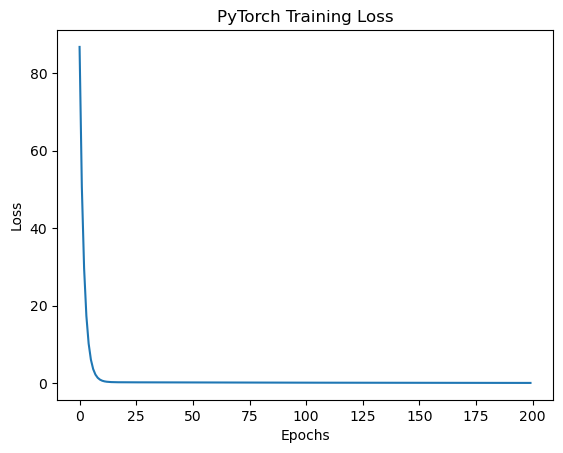

In [14]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("PyTorch Training Loss")
plt.show()

In [16]:
print(model(torch.tensor([[10.0]])))

tensor([[18.9239]], grad_fn=<AddmmBackward0>)


/home/keshav/anaconda3/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


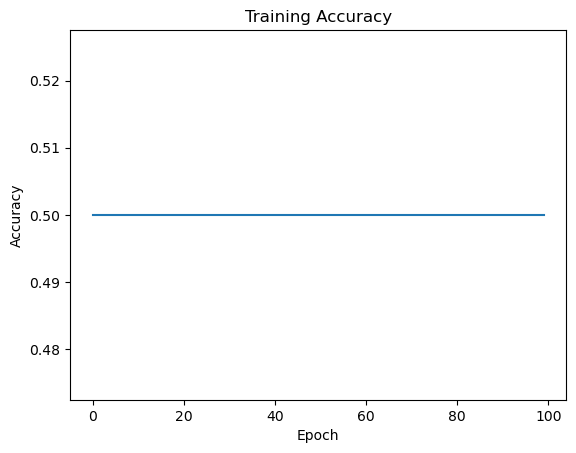

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Data (classification)
x = np.array([1,2,3,6,7,8], dtype=float)
y = np.array([0,0,0,1,1,1], dtype=float)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=[1])
])

# Compile (IMPORTANT)
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    x, y,
    epochs=100,
    verbose=0
)

# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.show()